In [38]:
#libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
#preprocess
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
#models
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
#check
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
#save
import pickle as pk

In [39]:
#pip install imbalanced-learn

In [40]:
#!pip install seaborn

In [41]:
df = pd.read_csv('Heart Disease.csv')

In [42]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [43]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No
319794,No,46.56,No,No,No,0,0,No,Female,80 or older,Hispanic,No,Yes,Good,8,No,No,No


In [44]:
df.shape

(319795, 18)

In [45]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

# Explore Data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [47]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

# Check Null Values

In [48]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [49]:
#all rows control for null values
df.isna().values.any()

False

In [50]:
df['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

# Duplicated values

In [51]:
df.duplicated().sum()

18078

In [52]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [53]:
df.shape

(301717, 18)

# Data Analysis & Visualization  using Seaborn Library, pyplot

<function matplotlib.pyplot.show(close=None, block=None)>

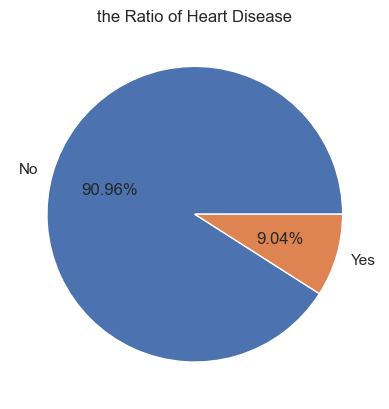

In [54]:
#show Ratio of HeartDisease from data
plt.pie(x = df['HeartDisease'].value_counts() ,autopct='%1.2f%%' ,labels=df['HeartDisease'].value_counts().index)
plt.title('the Ratio of Heart Disease')
plt.show

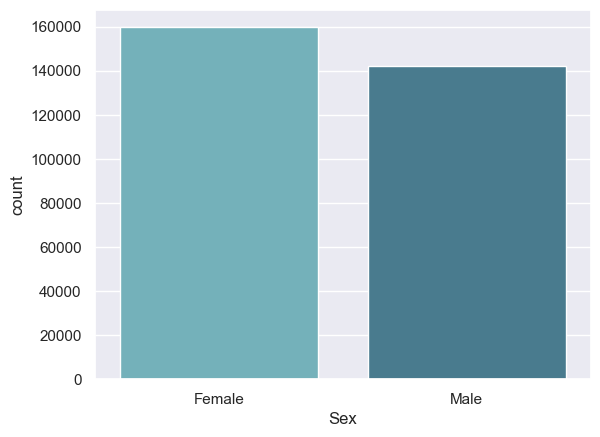

In [55]:
#show how many of Male and female 
sns.countplot(x = df['Sex'], palette='GnBu_d')
plt.show()

In [56]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex     HeartDisease
Female  No              148458
        Yes              11213
Male    No              125998
        Yes              16048
Name: HeartDisease, dtype: int64

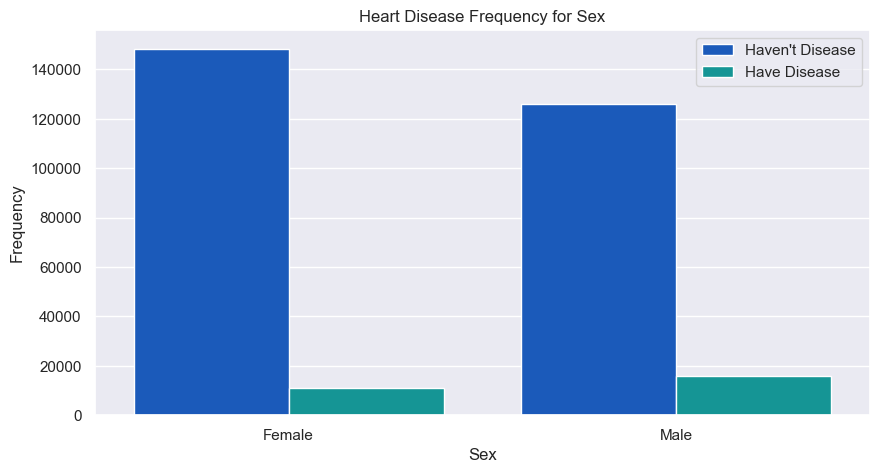

In [57]:
#show Heart Disease Frequency for Sex
plt.figure(figsize=(10,5))
sns.countplot(x = df['Sex'], data=df, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [58]:
#AgeCategory frequency
df['AgeCategory'].value_counts()

AgeCategory
65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: count, dtype: int64

In [59]:
df.groupby(['AgeCategory','HeartDisease'])['HeartDisease'].count()

AgeCategory  HeartDisease
18-24        No              19868
             Yes               130
25-29        No              16179
             Yes               133
30-34        No              17727
             Yes               226
35-39        No              19230
             Yes               296
40-44        No              19351
             Yes               486
45-49        No              19775
             Yes               743
50-54        No              22353
             Yes              1383
55-59        No              25411
             Yes              2199
60-64        No              27898
             Yes              3321
65-69        No              27596
             Yes              4074
70-74        No              24456
             Yes              4817
75-79        No              16686
             Yes              4027
80 or older  No              17926
             Yes              5426
Name: HeartDisease, dtype: int64

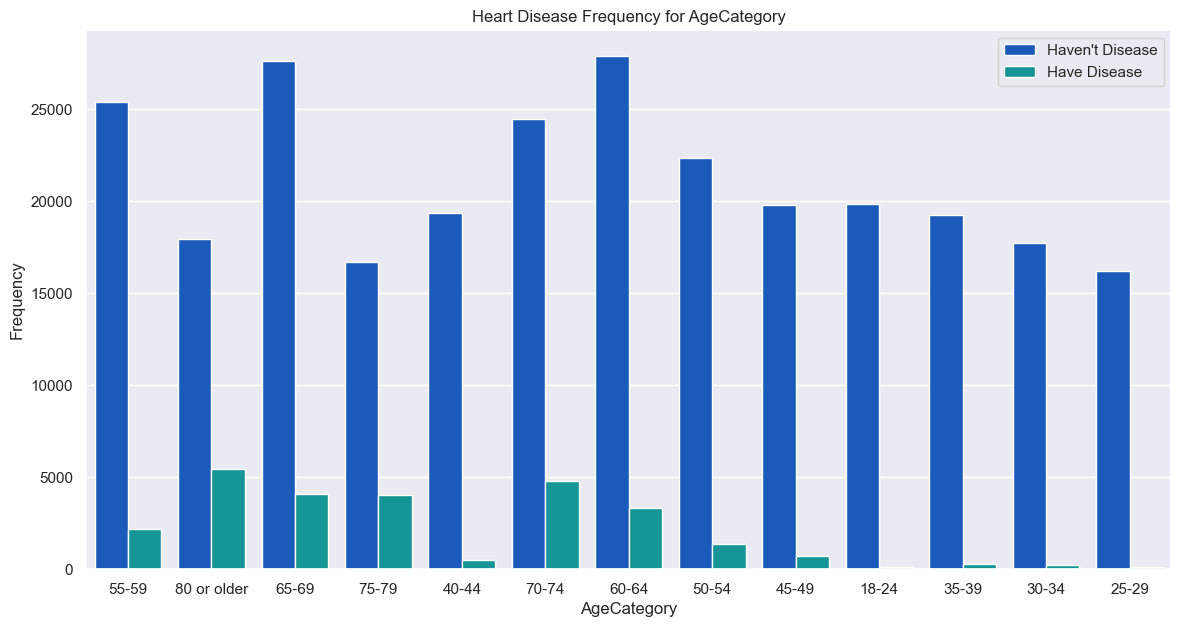

In [60]:
#show Heart Disease Frequency for AgeCategory
plt.figure(figsize=(14,7))
sns.countplot(x='AgeCategory', data=df, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [61]:
#the count of people Smoking
df['Smoking'].value_counts()

Smoking
No     174312
Yes    127405
Name: count, dtype: int64

In [62]:
df.groupby(['Sex','AgeCategory','Smoking','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  Smoking  HeartDisease
Female  18-24        No       No              7963
                              Yes               40
                     Yes      No              1132
                              Yes               10
        25-29        No       No              5746
                                              ... 
Male    75-79        Yes      Yes             1552
        80 or older  No       No              2905
                              Yes             1086
                     Yes      No              3512
                              Yes             1724
Name: HeartDisease, Length: 104, dtype: int64

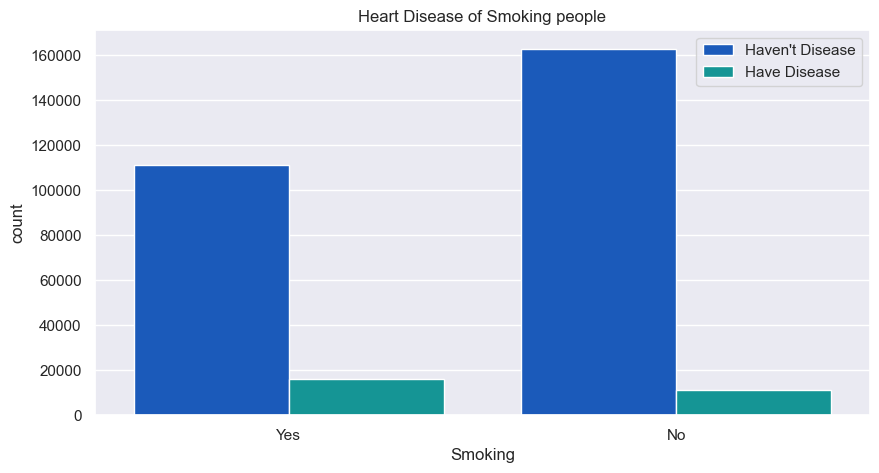

In [63]:
#show Heart Disease Frequency for Smoking
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=df,hue='HeartDisease',palette='winter')
plt.title('Heart Disease of Smoking people')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Smoking')
plt.show()

In [64]:
# I want to Know how many people drink the AlcoholDrinking or not 
df['AlcoholDrinking'].value_counts()

AlcoholDrinking
No     280136
Yes     21581
Name: count, dtype: int64

In [65]:
df.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()

AlcoholDrinking  HeartDisease
No               No              254016
                 Yes              26120
Yes              No               20440
                 Yes               1141
Name: HeartDisease, dtype: int64

In [66]:
df.groupby(['Sex','AgeCategory','AlcoholDrinking','PhysicalActivity','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  AlcoholDrinking  PhysicalActivity  HeartDisease
Female  18-24        No               No                No              1419
                                                        Yes                9
                                      Yes               No              6942
                                                        Yes               38
                     Yes              No                No                66
                                                                        ... 
Male    80 or older  No               Yes               Yes             1780
                     Yes              No                No                59
                                                        Yes               34
                                      Yes               No               127
                                                        Yes               41
Name: HeartDisease, Length: 208, dtype: int64

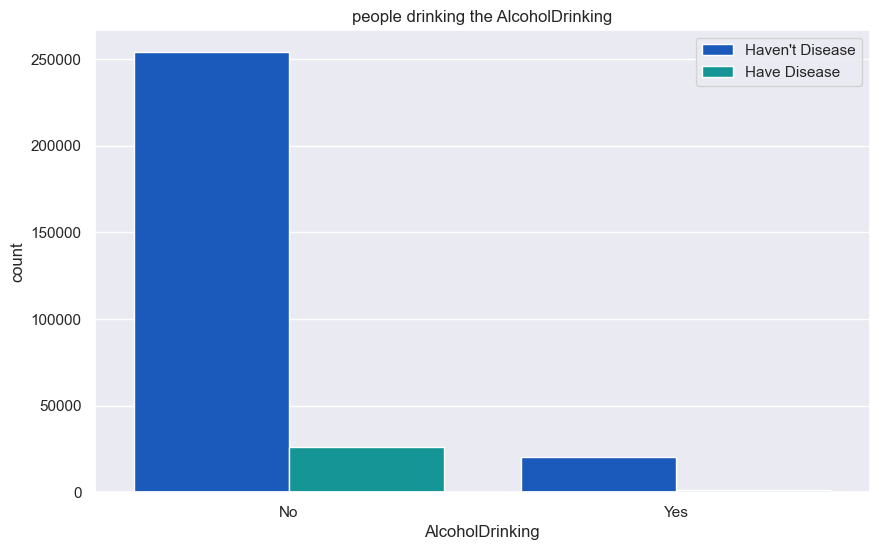

In [67]:
#Show how many people drink the AlcoholDrinking or not 
plt.figure(figsize=(10,6))
sns.countplot(x=df['AlcoholDrinking'],data=df , hue='HeartDisease',palette='winter')
plt.title('people drinking the AlcoholDrinking')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('AlcoholDrinking')
plt.show()

In [68]:
#I want to know how many people have KidneyDisease
df['KidneyDisease'].value_counts()

KidneyDisease
No     289941
Yes     11776
Name: count, dtype: int64

In [69]:
#show the peolple who have KidneyDisease and HeartDisease
df.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()

KidneyDisease  HeartDisease
No             No              266134
               Yes              23807
Yes            No                8322
               Yes               3454
Name: HeartDisease, dtype: int64

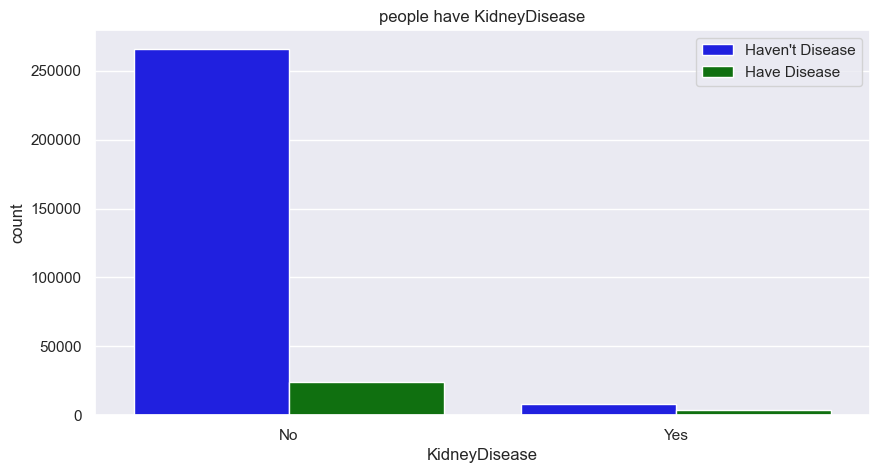

In [70]:
plt.figure(figsize=(10,5))
sns.countplot( x = 'KidneyDisease', data=df, hue='HeartDisease',palette=['blue','green'])
plt.title('people have KidneyDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

In [71]:
df.groupby(['Sex','KidneyDisease'])['KidneyDisease'].count()

Sex     KidneyDisease
Female  No               153218
        Yes                6453
Male    No               136723
        Yes                5323
Name: KidneyDisease, dtype: int64

In [72]:
#Show the SkinCancer  
df['SkinCancer'].value_counts()

SkinCancer
No     272425
Yes     29292
Name: count, dtype: int64

In [73]:
#Show people have SkinCancer
df.groupby(['Sex','SkinCancer'])['SkinCancer'].count()

Sex     SkinCancer
Female  No            144876
        Yes            14795
Male    No            127549
        Yes            14497
Name: SkinCancer, dtype: int64

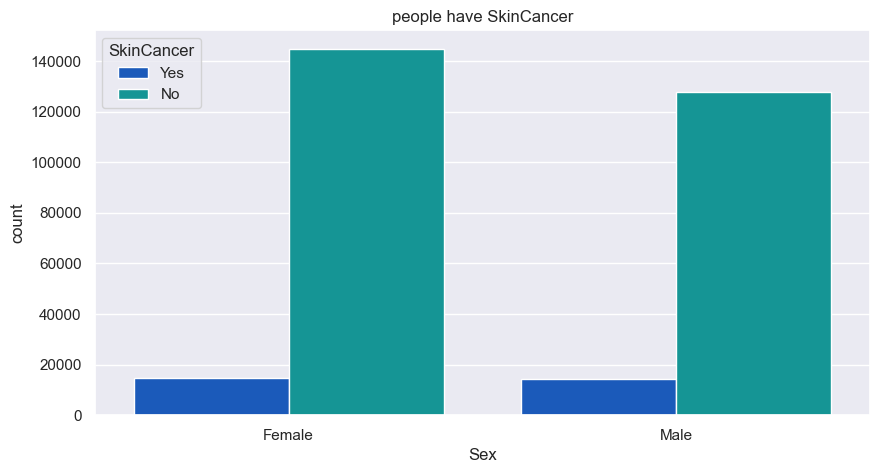

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',data=df, hue='SkinCancer',palette='winter')
plt.title('people have SkinCancer')
plt.show()

In [75]:
df.groupby(['Sex','SkinCancer','HeartDisease'])['HeartDisease'].count()

Sex     SkinCancer  HeartDisease
Female  No          No              135339
                    Yes               9537
        Yes         No               13119
                    Yes               1676
Male    No          No              114793
                    Yes              12756
        Yes         No               11205
                    Yes               3292
Name: HeartDisease, dtype: int64

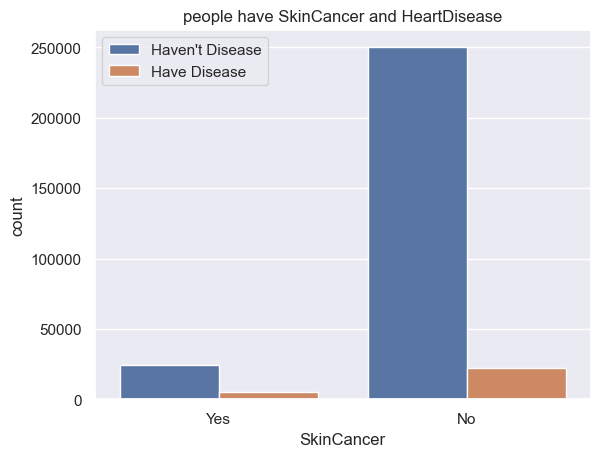

In [76]:
sns.countplot(x = 'SkinCancer', data=df , hue = 'HeartDisease')
plt.title('people have SkinCancer and HeartDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

# Check the Distribution and skewness of the features

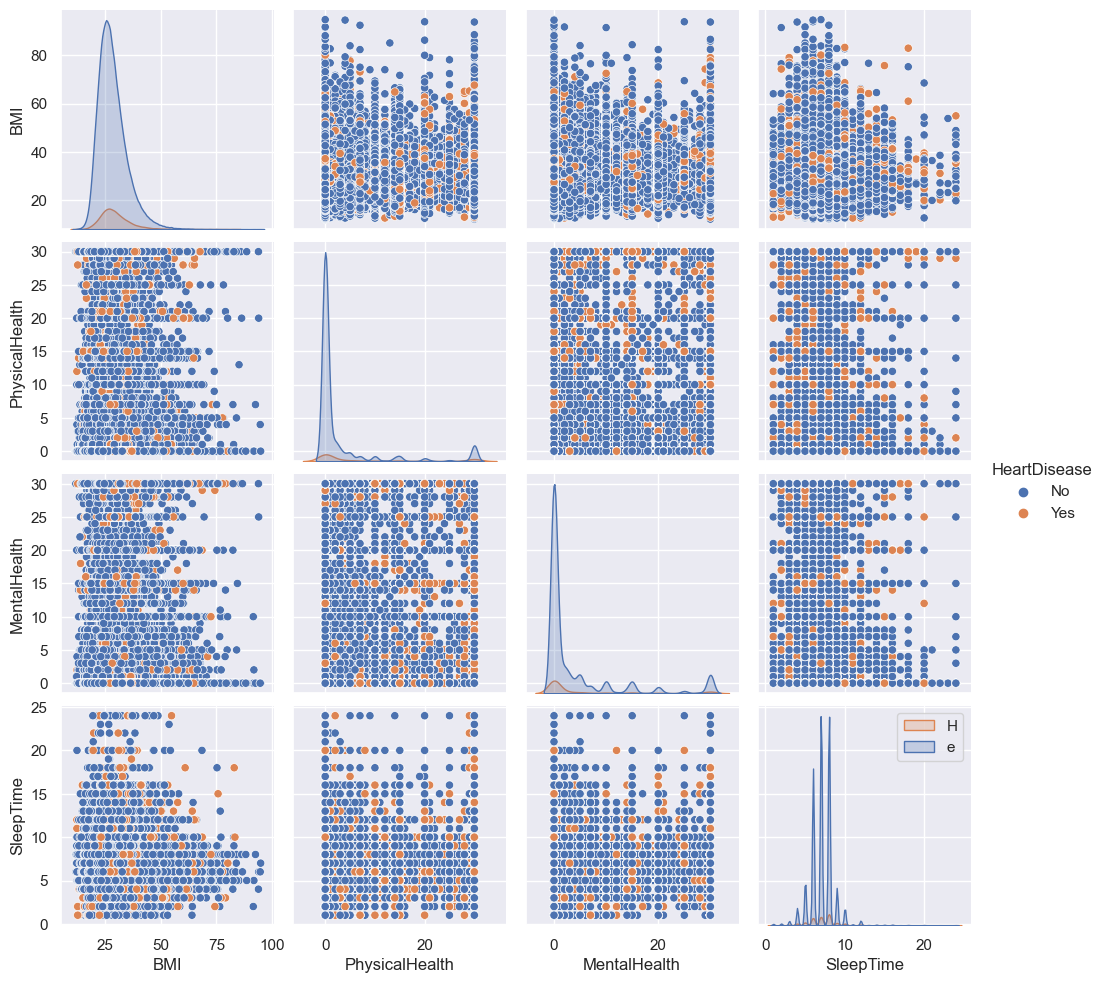

In [77]:
sns.pairplot(data = df , hue= 'HeartDisease')
plt.legend('HeartDisease')

In [78]:
label = LabelEncoder()

# Iterate over each column in the DataFrame
for col in df:
    # Apply label encoding to the column
    df[col] = label.fit_transform(df[col])

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1180,1,0,0,7,0,1,1,8,3,2,0,1,5,1,0,0
319791,0,1397,1,0,0,0,0,0,1,3,3,0,1,4,4,1,0,0
319792,0,886,0,0,0,0,0,0,0,5,3,0,1,2,5,0,0,0
319793,0,1658,0,0,0,0,0,0,0,1,3,0,0,2,11,0,0,0


In [79]:
x = df.drop('HeartDisease',axis=1)
y = df[['HeartDisease']]

In [80]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.75,random_state=42) 

# Over Sampling

In [81]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
over = RandomOverSampler(random_state=42)

# Perform oversampling on x and y
x_new, y_new = over.fit_resample(x, y)

# Hold Out Cross Validation

In [82]:
# Split the data into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=0.75, random_state=42) 

# Create a Decision Tree Classifier
dt = DecisionTreeClassifier() 

# Fit the classifier to the training data
dt.fit(xtrain, ytrain) 

# Evaluate the model's accuracy on the test data
test_score= dt.score(xtest, ytest)  # after sampling
print("Accuracy on test data:", test_score)

# Evaluate the model's accuracy on the training data
train_score = dt.score(xtrain, ytrain)  # after sampling
print("Accuracy on training data:", train_score)


Accuracy on test data: 0.9508846591074708
Accuracy on training data: 0.9979328805588753


# RandomForestClassifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier
rf = RandomForestClassifier()

# Train the random forest classifier on the training data
rf.fit(xtrain, ytrain)

# Calculate and print the accuracy score on the test data
test_score = rf.score(xtest, ytest)
print("Accuracy on test data:", test_score)

# Calculate and print the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Accuracy on training data:", train_score)

C:\Users\amt\AppData\Local\Temp\ipykernel_10340\1988699700.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain, ytrain)


Accuracy on test data: 0.9668726498965226
Accuracy on training data: 0.9979280224638315


In [84]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", train_score)

Training accuracy: 0.786387131877848
Testing accuracy: 0.786387131877848


# Without sampling

In [85]:
# Split the data into training and testing sets
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=0.75, random_state=42)

# Fit the decision tree model on the training data
dt.fit(xtrain1, ytrain1)

# Evaluate the model's performance on the testing data
test_score= dt.score(xtest1, ytest1)  # imbalanced old data
print("Accuracy on testing data:", test_score)

Accuracy on testing data: 0.8539440540898846


# K Fold Cross Validation

In [86]:
from sklearn.model_selection import KFold, cross_val_score

# Create KFold object with 5 splits and shuffling
kfold = KFold(n_splits=5, shuffle=True)

# Perform cross-validation using KFold
result = cross_val_score(xgb, x_new, y_new, cv=kfold) 

# Print the cross-validation scores
result= result
print('result:', result)

# Calculate the mean of the cross-validation scores
mean_score= result.mean()
print('mean score:', mean_score)

# Get the maximum value from the cross-validation scores
max_score= result.max()
print('max score:', max_score)

# Get the minimum value from the cross-validation scores
min_score= result.min()
print('min score:', min_score)

result: [0.78207919 0.78049425 0.78123007 0.7811572  0.7816582 ]
mean score: 0.7813237824535164
max score: 0.7820791925890165
min score: 0.7804942477432754


In [87]:
Clf = DecisionTreeClassifier()
# Train the random forest classifier on the training data
Clf.fit(xtrain, ytrain)
# Calculate and print the accuracy score on the test data
test_score= Clf.score(xtest, ytest)  # after sampling
print("Accuracy on testing data:", test_score)
score= Clf.score(x, y)
print("Accuracy on testing data:", score)

Accuracy on testing data: 0.9511688576675315
Accuracy on testing data: 0.9750925536181256


# post pornong

In [88]:
from sklearn import tree

In [89]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [91]:
#plt.figure(figsize=(15,10))
#tree.plot_tree(clf,filled=True, feature_names = x_new.columns)

In [92]:
pruning_path = clf.cost_complexity_pruning_path(xtrain, ytrain) # clf = DecisionTreeClassifier 
ccp_alpha_values = pruning_path.ccp_alphas

In [93]:
ccp_alpha_values

array([0.        , 0.        , 0.        , ..., 0.0103947 , 0.01329316,
       0.07850674])

In [94]:
clfs_list = []  # save diffrent classifiers

for x in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=x)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)
    


KeyboardInterrupt: 

In [ ]:
clfs_list

# Compare

In [ ]:
train_scores = [clf.score(xtrain, ytrain) for clf in clfs_list]  
test_scores = [clf.score(xtest, ytest) for clf in clfs_list]

In [ ]:
train_scores

In [ ]:
test_scores

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()

In [ ]:
# clf2 = DecisionTreeClassifier(random_state=42, ccp_alpha= ccp alpha valu okhane je asbe ota ai khane bosaben)

In [ ]:
#clf2.fit(xtrain,ytrain)

In [ ]:
#pred=clf.predict(xtest)

In [ ]:
#accuracy_score(ytest, pred)

In [ ]:
sjakjkjhsd just for save kajklhffjlksj;flsd f
